In [70]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [68]:

df= pd.read_csv('shampoo.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes
None


,Month,Sales
0,1/1/2017 0:00,266.0
1,2/1/2017 0:00,145.9
2,3/1/2017 0:00,183.1
3,4/1/2017 0:00,119.3
4,5/1/2017 0:00,180.3


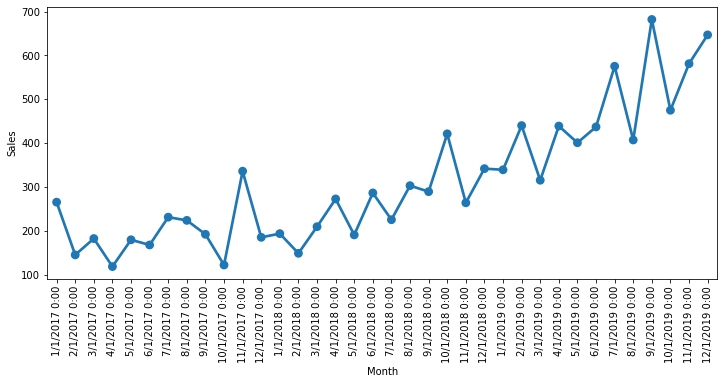

In [82]:
# df['Sales'].plot(legend=True)
plt.figure(figsize=(12,5))
sns.pointplot(x='Month',y='Sales', data= df)
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df.rename(columns={'Sales': 'y', 'Month':'ds'})
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])
model = Prophet() #instantiate Prophet
model.fit(df)

18:46:31 - cmdstanpy - INFO - Chain [1] start processing
18:46:32 - cmdstanpy - INFO - Chain [1] done processing


In [14]:

''' {'year': 'A',
    'quarter': 'Q',
    'month': 'M',
    'day': 'D',
    'hour': 'H',
    'minute': 'T',
    'second': 'S',
    'millisecond': 'L',
    'microsecond': 'U',
    'nanosecond': 'N'}
'''
    
    
future_data = model.make_future_dataframe(periods=10, freq = 'M')
future_data
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)



,ds,yhat,yhat_lower,yhat_upper
36,2019-12-31,1.641286,1.608974,1.676304
37,2020-01-31,2.041112,2.008076,2.078766
38,2020-02-29,1.817627,1.782781,1.853933
39,2020-03-31,1.955034,1.921189,1.986916
40,2020-04-30,1.851831,1.821306,1.885084
41,2020-05-31,1.904000,1.872445,1.938908
42,2020-06-30,1.910682,1.877735,1.944361
43,2020-07-31,1.863882,1.831218,1.897368
44,2020-08-31,1.994360,1.959780,2.027926
45,2020-09-30,1.998252,1.963433,2.034622


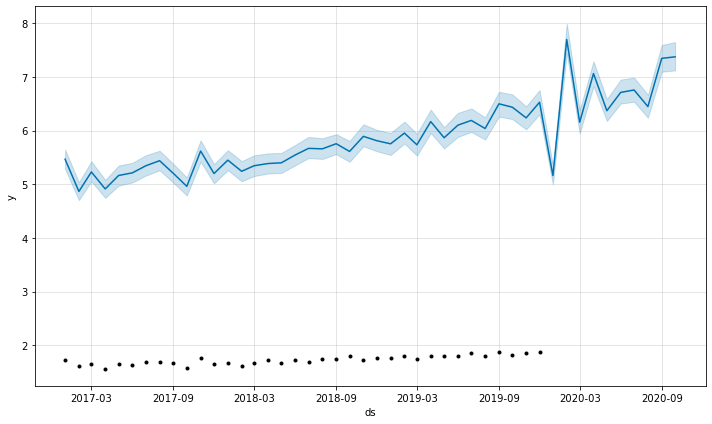

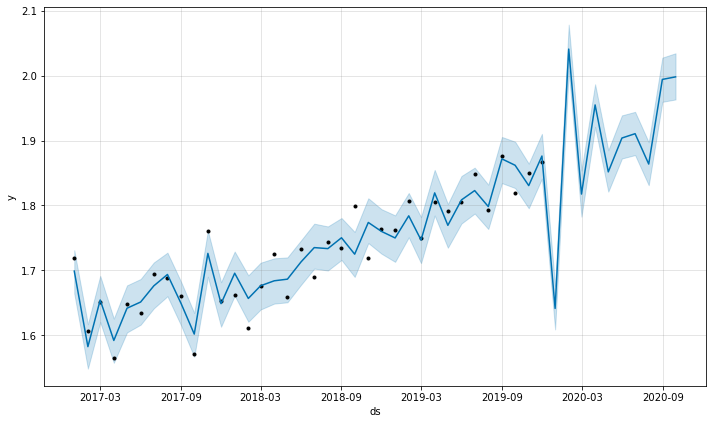

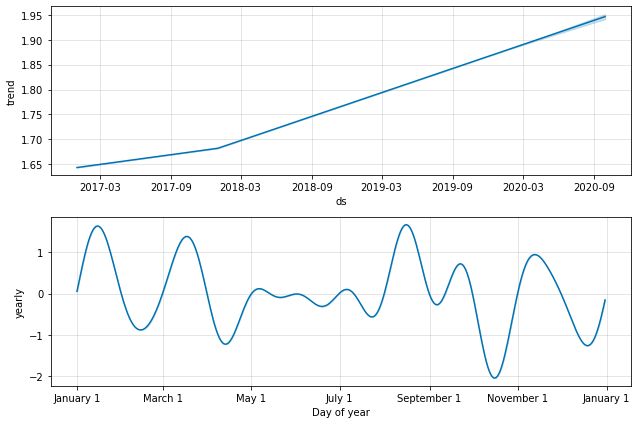

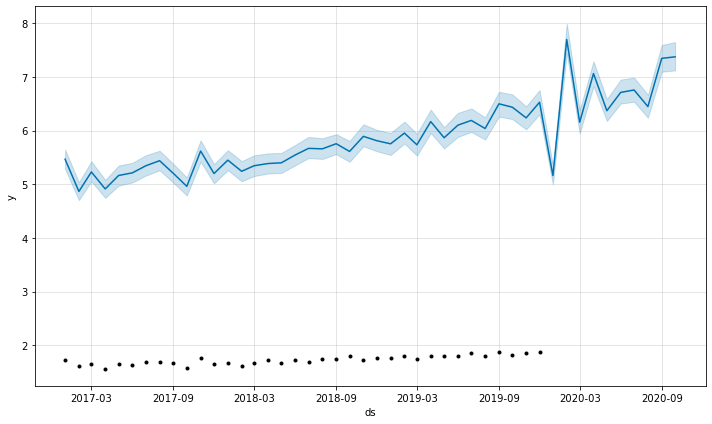

In [15]:
    model.plot(forecast_data) 
    model.plot_components(forecast_data)
    forecast_data_orig = forecast_data # make sure we save the original forecast data
    forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
    forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
    forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
    model.plot(forecast_data_orig)


In [19]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']
final_df = pd.DataFrame(forecast_data_orig)
final_df_1=final_df[['ds','yhat']].tail(10)
final_df_1 = final_df_1.rename(columns={'yhat': 'Sales', 'ds':'Month'})
rmse = mean_squared_error(df["y_orig"].iloc[24:], final_df['yhat'].iloc[24:36])**0.5
print('Test MSE: %.3f' % rmse)

Test MSE: 0.119


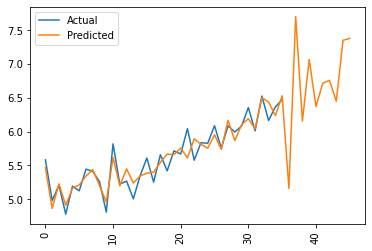

In [28]:
fig,ax=plt.subplots(nrows=1, ncols=1)
ax.plot(df["y_orig"],label="Actual")
ax.plot(final_df["yhat"],label="Predicted")
ax.legend()
plt.xticks(rotation=90)
plt.show()
# n=random.randint(0,1000000000000)
# n=str(n)
# fig.savefig(os.path.join(app.config["IMAGE_UPLOADS"],n+'time_series.png'))  
# full_filename= os.path.join(app.config["IMAGE_UPLOADS"],n+'time_series.png')   
            
#return 'nothing'
# return render_template('home.html',user_image = full_filename,tables=[final_df_1.to_html(classes='forecast')],titles=['na','forecast'],query1 = request.form['query1'],query2 = request.form['query2'],query3 = request.form['query3'])
    


# Forecasting sales using RandomForest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# # Set a seed for reproducibility
# np.random.seed(42)
# # Generate a date range from January 2016 to December 2020
# date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')
# # Generate random sales values
# sales_values = np.random.randint(1000, 5000, size=len(date_range))

# # Create the DataFrame
# sales_df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})

# # Print the DataFrame
# df= sales_df.copy()
# df.head()


In [106]:
df['Month']= pd.to_datetime(df['Month'])
df

,Month,Sales
0,2017-01-01,266.0
1,2017-02-01,145.9
2,2017-03-01,183.1
3,2017-04-01,119.3
4,2017-05-01,180.3
5,2017-06-01,168.5
6,2017-07-01,231.8
7,2017-08-01,224.5
8,2017-09-01,192.8
9,2017-10-01,122.9


In [108]:
model = RandomForestRegressor() #instantiate Prophet
model.fit(df[['Month']],df['Sales'])


RandomForestRegressor()

In [109]:
# pd.DataFrame({'Month': pd.date_range(start=df.index[-1]+pd.DateOffset(months=1), periods=5, freq='M')})
future_data=pd.DataFrame({"Month":pd.date_range(start=df['Month'].max() + pd.DateOffset(months=1), periods=12, freq='MS')})

In [110]:
forecast_data = model.predict(future_data[['Month']])
future_data['forecasted']=forecast_data

In [111]:
# Concatenate the initial DataFrame and the forecast DataFrame
# merged_df = df.merge(future_data, on='Month', how='outer')
df_final=pd.concat([df, future_data], ignore_index=True)
df_final

,Month,Sales,forecasted
0,2017-01-01,266.0,NaN
1,2017-02-01,145.9,NaN
2,2017-03-01,183.1,NaN
3,2017-04-01,119.3,NaN
4,2017-05-01,180.3,NaN
5,2017-06-01,168.5,NaN
6,2017-07-01,231.8,NaN
7,2017-08-01,224.5,NaN
8,2017-09-01,192.8,NaN
9,2017-10-01,122.9,NaN


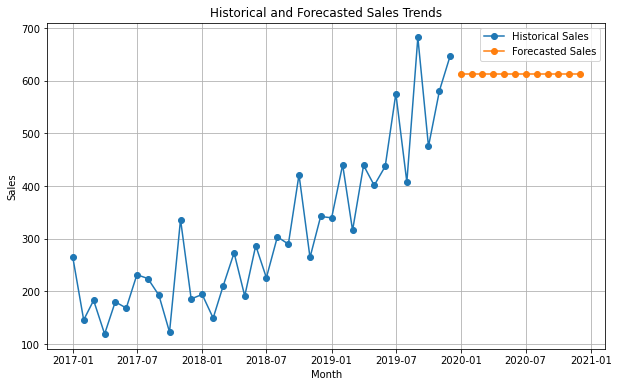

In [112]:
# Plot the historical sales and forecasted trends
plt.figure(figsize=(10, 6))
plt.plot(df_final['Month'], df_final['Sales'], label='Historical Sales', marker='o')
plt.plot(df_final['Month'], df_final['forecasted'], label='Forecasted Sales', marker='o')
plt.title('Historical and Forecasted Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA Model

- 1st Method

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -500.730
Date:                Tue, 28 Nov 2023   AIC                           1007.459
Time:                        15:11:22   BIC                           1013.692
Sample:                             0   HQIC                          1009.892
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0081      0.145     -0.056      0.956      -0.293       0.276
ma.L1         -0.9999      0.315     -3.175      0.001      -1.617      -0.383
sigma2      1.289e+06   2.45e-07   5.27e+12      0.0

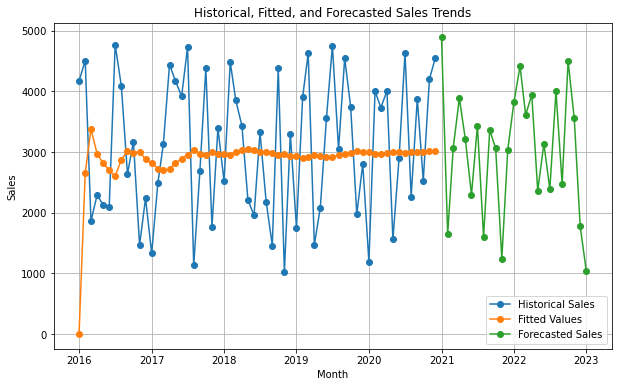

In [119]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})

# Extend the date range by 5 months for forecasting
forecast_range = pd.date_range(start=df['Month'].max() + pd.DateOffset(months=1), periods=25, freq='MS')

# Generate random sales values for the forecasted period
forecast_values = np.random.randint(1000, 5000, size=len(forecast_range))

# Create the forecast DataFrame
future_data = pd.DataFrame({'Month': forecast_range, 'Sales': forecast_values})

# Merge the initial DataFrame and the forecast DataFrame based on the 'Month' column
merged_df = df.merge(future_data, on='Month', how='outer')

# Fit ARIMA model to historical sales data
order = (1, 1, 1)  # Example order for ARIMA model (p, d, q)
model = sm.tsa.ARIMA(df['Sales'], order=order)
results = model.fit()

# Print model summary
print(results.summary())

# Plot the historical sales, fitted values, and forecasted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Month'], df['Sales'], label='Historical Sales', marker='o')
ax.plot(df['Month'], results.fittedvalues, label='Fitted Values', marker='o')
ax.plot(merged_df['Month'], merged_df['Sales_y'], label='Forecasted Sales', marker='o')
ax.set_title('Historical, Fitted, and Forecasted Sales Trends')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.legend()
ax.grid(True)
plt.show()

- 2nd Method

c:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

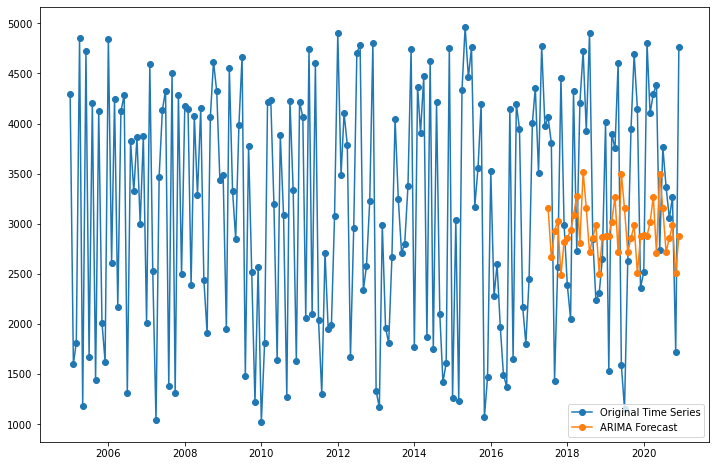

In [122]:
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate a date range from January 2005 to December 2020
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)

# ----------------------------------------------------------------
train_data = df.iloc[:150]
test_data = df.iloc[150:]
# ----------------------------------------------------------------

start = len(train_data)
end = len(train_data) + len(test_data) -1

# Manually specify the lag order (you can adjust this based on your data)
lag_order = 1

# Use pmdarima to automatically find the best ARIMA order
arima_order = auto_arima(train_data['Sales'], suppress_warnings=True).order

model1 = AutoReg(train_data['Sales'], lags=lag_order)
model2 = ARIMA(order=arima_order)
model3 = SARIMAX(train_data['Sales'], order=arima_order, seasonal_order=(1, 1, 1, 12))  # Example seasonal order, adjust as needed
model4 = SARIMAX(train_data['Sales'], exog=train_data[['Sales']],order=(1,0,1), seasonal_order=(1, 0, 1, 7), enforce_invertibility=False)  # Example seasonal order, adjust as needed
AR_fit = model3.fit()

exog_forecast= df[150:][['Sales']]
# Use dynamic=False for out-of-sample predictions
prediction1 = AR_fit.predict(start=start, end=end, dynamic=False)
# prediction1 = AR_fit.predict(start=start, end=end, exog=exog_forecast)
# prediction1
# Plot the original time series and predicted values
plt.figure(figsize=(12, 8))
plt.plot(df['Sales'], label='Original Time Series', marker='o')
plt.plot(prediction1.index, prediction1, label='ARIMA Forecast', marker='o')
plt.legend()
plt.show()


# Fine Tuned ARIMA model

In [124]:
 # Now testing for stationarity
from statsmodels.tsa.stattools import adfuller


In [160]:
# Generate a date range from January 2005 to December 2020
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)
plt.figure(figsize=(12,8))
# sns.pointplot(x='Month',y='Sales', data= df)
# plt.xticks(rotation=90)
df.head()

,Sales
Month,
2005-01-01,1661
2005-02-01,4526
2005-03-01,2719
2005-04-01,4066
2005-05-01,1978


<Figure size 864x576 with 0 Axes>

In [161]:
#HO: it is non-stationary
# H1: it is stationary


def adfuller_test(dataset):
    result= adfuller(dataset, autolag='AIC')
    print("1.ADF Statistics :", result[0])
    print("2.p-value :", result[1])
    print("3.# No of lags used :", result[2])
    print("4. Critical values :")
    
    for  key, val in result[4].items():
        print('Critical value', key , '=', val)  
    
    print('\Statatistical Hypothesis based on P-value')
    if (result[1]<.05):
        print('The data is Stationary its mean that we are \
        rejecting the Ho Hypothesis')
    else:
        print('The data is Non-Stationary, i.e we dont have\
        enough evidence to reject HO hypothesis')
        

adfuller_test(df['Sales'])
            

1.ADF Statistics : -14.553928051560323
2.p-value : 4.91597750484545e-27
3.# No of lags used : 0
4. Critical values :
Critical value 1% = -3.465058702600837
Critical value 5% = -2.8767942675230356
Critical value 10% = -2.5749014492475535
\Statatistical Hypothesis based on P-value
The data is Stationary its mean that we are         rejecting the Ho Hypothesis


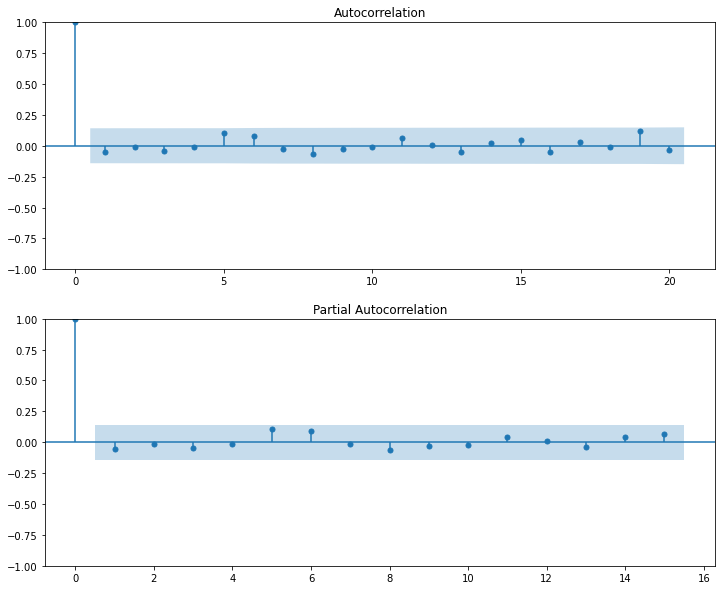

In [162]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax= plt.subplots(2, figsize=(12,10))
ax[0]=plot_acf(df['Sales'],ax=ax[0],lags=20)
ax[1]=plot_pacf(df['Sales'],ax=ax[1],lags=15)

In [163]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

model= ARIMA(df['Sales'],order=(1,1,0))
model_fit= model.fit()
pred_y= model_fit.forecast()[0]
pred_y

3752.4476824992944

In [164]:

import itertools
import warnings
warnings.filterwarnings('ignore')

# Best way to choose the best AIC  values by running loop for Non-Seasonal dataset


p=d=q=range(0,5)

pdq=list(itertools.product(p,d,q))

pred_list=list()
aic_list=list()
order_list=list()

for pm in pdq:
    
    try:
        model= ARIMA(df['Sales'],order=pm)
        model_fit= model.fit()
        pred_y= model_fit.forecast()[0]
        AIC= model_fit.aic
        order_list.append(pm)
        pred_list.append(pred_y)
        aic_list.append(AIC)
        print("ARIMA %s AIC = %.2f" %(pm, AIC))
        
    except:
        continue 
        
df_aic= pd.DataFrame(list(zip(order_list,pred_list,aic_list)),columns=['Order','Prediction','AIC'])
df_aic        

ARIMA (0, 0, 0) AIC = 3254.89
ARIMA (0, 0, 1) AIC = 3256.31
ARIMA (0, 0, 2) AIC = 3258.27
ARIMA (0, 0, 3) AIC = 3260.00
ARIMA (0, 0, 4) AIC = 3262.03
ARIMA (0, 1, 0) AIC = 3378.83
ARIMA (0, 1, 1) AIC = 3246.58
ARIMA (0, 1, 2) AIC = 3248.25
ARIMA (0, 1, 3) AIC = 3250.17
ARIMA (0, 1, 4) AIC = 3251.97
ARIMA (0, 2, 0) AIC = 3571.81
ARIMA (0, 2, 1) AIC = 3367.97
ARIMA (0, 2, 2) AIC = 3244.21
ARIMA (0, 2, 3) AIC = 3245.86
ARIMA (0, 2, 4) AIC = 3247.94
ARIMA (0, 3, 0) AIC = 3781.33
ARIMA (0, 3, 1) AIC = 3557.52
ARIMA (0, 3, 2) AIC = 3361.20
ARIMA (0, 3, 3) AIC = 3245.14
ARIMA (0, 3, 4) AIC = 3246.80
ARIMA (0, 4, 0) AIC = 3996.89
ARIMA (0, 4, 1) AIC = 3765.75
ARIMA (0, 4, 2) AIC = 3550.64
ARIMA (0, 4, 3) AIC = 3354.38
ARIMA (0, 4, 4) AIC = 3263.98
ARIMA (1, 0, 0) AIC = 3256.33
ARIMA (1, 0, 1) AIC = 3258.22
ARIMA (1, 0, 2) AIC = 3260.23
ARIMA (1, 0, 3) AIC = 3261.99
ARIMA (1, 0, 4) AIC = 3263.19
ARIMA (1, 1, 0) AIC = 3323.05
ARIMA (1, 1, 1) AIC = 3248.26
ARIMA (1, 1, 2) AIC = 3250.18
ARIMA (1, 

,Order,Prediction,AIC
0,"(0, 0, 0)",2892.223958,3254.890864
1,"(0, 0, 1)",2872.279910,3256.309180
2,"(0, 0, 2)",2852.370135,3258.270998
3,"(0, 0, 3)",2903.695125,3260.000826
4,"(0, 0, 4)",2905.865846,3262.030739
...,...,...,...
120,"(4, 4, 0)",5389.101968,3579.417794
121,"(4, 4, 1)",2681.108618,3452.263198
122,"(4, 4, 2)",2880.089577,3402.796778
123,"(4, 4, 3)",3015.916172,3373.308397


In [165]:
df_aic.sort_values(by='AIC',ascending=True)[:5]

,Order,Prediction,AIC
12,"(0, 2, 2)",2990.973146,3244.209412
18,"(0, 3, 3)",2951.113111,3245.143052
13,"(0, 2, 3)",2980.252366,3245.861515
37,"(1, 2, 2)",2982.901101,3245.953698
6,"(0, 1, 1)",2883.623335,3246.584443


In [169]:
###For non-seasonal data
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

model= ARIMA(df['Sales'], order=(0,2,2))
model_fit= model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  192
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -1619.105
Date:                Wed, 29 Nov 2023   AIC                           3244.209
Time:                        12:01:55   BIC                           3253.950
Sample:                    01-01-2005   HQIC                          3248.155
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9999      0.166    -12.047      0.000      -2.325      -1.675
ma.L2          0.9999      0.166      6.025      0.000       0.675       1.325
sigma2      1.344e+06   2.47e-07   5.44e+12      0.000    1.34e+06    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                11.95
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.12
Prob(H) (two-sided):                  0.66   Kurtosis:                         1.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.33e+28. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Month'>

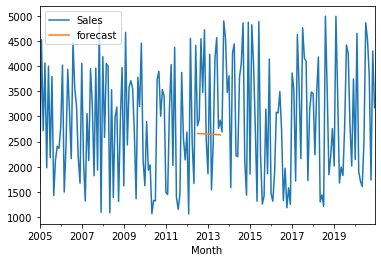

In [170]:
df['forecast']= model_fit.predict(start=90, end=103,typ='levels' ,dynamic=True)
df[['Sales','forecast']].plot()

# Now SARIMAX model

In [172]:
#---------------100% working---------------------------------------------------------------------

import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')

p=d=q=range(0,3)

pdq=list(itertools.product(p,d,q))
seasonal_pdq =[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]


metric_aic_dic=dict()   # Here we are storing our AICs result  one by one

for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        
        try:
            model= sm.tsa.statespace.SARIMAX(df['Sales'], order=pm, seasonal_order=pm_seasonal)
            model_aic= model.fit()
            print('ARIMA {} x {}x12 - AIC :{}'.format(pm, pm_seasonal, model_aic.aic))
            metric_aic_dic.update({(pm,pm_seasonal):model_aic.aic})
        except: 
            continue  
            
### Conveting AICs dict values into datafram and then sorting its values, in order to find minimum AIC
aic_df=pd.DataFrame({'(p,d,q)x(p,d,q,12)':metric_aic_dic.keys(), 'AIC':metric_aic_dic.values()})            

ARIMA (0, 0, 0) x (0, 0, 0, 12)x12 - AIC :3635.4187247630025
ARIMA (0, 0, 0) x (0, 0, 1, 12)x12 - AIC :3531.9212655771303
ARIMA (0, 0, 0) x (0, 0, 2, 12)x12 - AIC :3470.609007297003
ARIMA (0, 0, 0) x (0, 1, 0, 12)x12 - AIC :3172.8684849118326
ARIMA (0, 0, 0) x (0, 1, 1, 12)x12 - AIC :3091.0880808814754
ARIMA (0, 0, 0) x (0, 1, 2, 12)x12 - AIC :3093.4517390366
ARIMA (0, 0, 0) x (0, 2, 0, 12)x12 - AIC :3151.840227621102
ARIMA (0, 0, 0) x (0, 2, 1, 12)x12 - AIC :2999.5204698987845
ARIMA (0, 0, 0) x (0, 2, 2, 12)x12 - AIC :2953.587140326161
ARIMA (0, 0, 0) x (1, 0, 0, 12)x12 - AIC :3389.5500444122044
ARIMA (0, 0, 0) x (1, 0, 1, 12)x12 - AIC :3312.82632205607
ARIMA (0, 0, 0) x (1, 0, 2, 12)x12 - AIC :3314.086215042534
ARIMA (0, 0, 0) x (1, 1, 0, 12)x12 - AIC :3129.979175549358
ARIMA (0, 0, 0) x (1, 1, 1, 12)x12 - AIC :3093.011948131514
ARIMA (0, 0, 0) x (1, 1, 2, 12)x12 - AIC :3093.9158197488255
ARIMA (0, 0, 0) x (1, 2, 0, 12)x12 - AIC :3059.827511602849
ARIMA (0, 0, 0) x (1, 2, 1, 12)x12 -

In [173]:
### Conveting AICs dict values into datafram and then sorting its values, in order to find minimum AIC
aic_df=pd.DataFrame({'(p,d,q)x(p,d,q,12)':metric_aic_dic.keys(), 'AIC':metric_aic_dic.values()})           
aic_df.sort_values(by='AIC')[:5]

,"(p,d,q)x(p,d,q,12)",AIC
632,"((2, 1, 2), (1, 2, 2, 12))",16.000000
223,"((0, 2, 2), (0, 2, 2, 12))",2921.109681
115,"((0, 1, 1), (0, 2, 2, 12))",2922.592698
232,"((0, 2, 2), (1, 2, 2, 12))",2923.032051
124,"((0, 1, 1), (1, 2, 2, 12))",2924.611280


In [174]:
###-WE can also find the optimum value of p,d,q by applying auto-arima method

from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(df['Sales'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series like if we are taking seasonal then m=12
                      d=None,           # let model determine 'd'
                      seasonal=True,   #  Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model_autoARIMA.summary()

##------Before moving forward, let’s review the residual plots from auto ARIMA.
### model_autoARIMA.plot_diagnostics(figsize=(15,8))
###plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=3256.868, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3254.888, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3258.319, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3258.288, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3635.419, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=3256.886, Time=0.11 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3256.326, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3256.310, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3258.341, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.450 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:                        SARIMAX   Log Likelihood               -1625.444
Date:                Wed, 29 Nov 2023   AIC                           3254.888
Time:                        12:59:47   BIC                           3261.403
Sample:                    01-01-2005   HQIC                          3257.527
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2892.2240     83.958     34.449      0.000    2727.670    3056.778
sigma2      1.321e+06   2.26e+05      5.856      0.000    8.79e+05    1.76e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                13.42
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.13
Prob(H) (two-sided):                  0.38   Kurtosis:                         1.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [175]:
# After running loop we get (1,2,2)x(0,2,2,12) for optimum forcasting
import statsmodels.api as sm

model1= sm.tsa.statespace.SARIMAX(df['Sales'],order=(2,1,2)\
                                , seasonal_order=(1,2,2,12))
results1= model1.fit()


# After running auto ARIMA we get (1,0,0)x(1,0,0,12) for forcasting

model2= sm.tsa.statespace.SARIMAX(df['Sales'],order=(0,0,0)\
                                , seasonal_order=(0,0,0,12))
results2= model2.fit()

<AxesSubplot:xlabel='Month'>

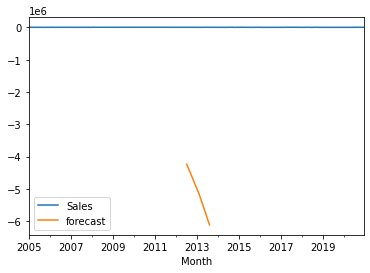

In [176]:
# Forcasting Mannual Model
df['forecast']= results1.predict(start=90,end=103, dynamic=True)
df[['Sales','forecast']].plot()

<AxesSubplot:xlabel='Month'>

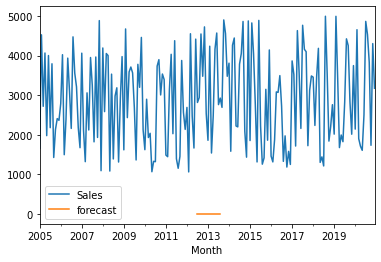

In [177]:
# Forcasting Auto Arima Model
df['forecast']= results2.predict(start=90,end=103, dynamic=True)
df[['Sales','forecast']].plot()

In [ ]:
# Now we are gonna predict future value by adding some new date

from pandas.tseries.offsets import DateOffset

future_dates= [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [ ]:
future_dates_df= pd.DataFrame(index=future_dates[1:],columns=df.columns )

In [ ]:
future_df= pd.concat([df, future_dates_df])

In [ ]:
future_df['forecast']=results1.predict(start=104, end=120, dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(15,5))

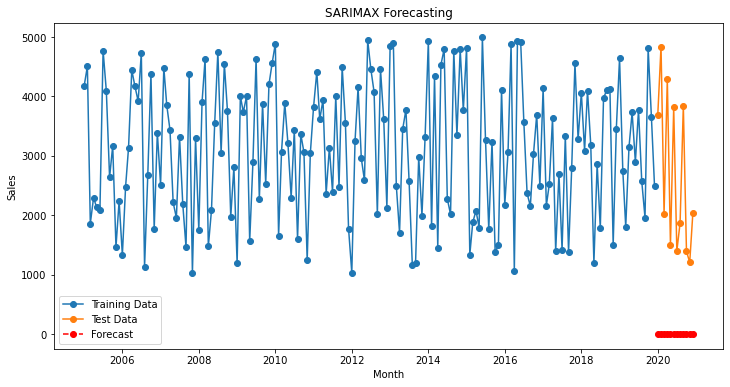

In [180]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Create a fake time series dataset
np.random.seed(42)
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')
sales_values = np.random.randint(1000, 5000, size=len(date_range))
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)

# Split the dataset into training and testing sets
train_data = df.iloc[:-12]  # Use all but the last 12 months for training
test_data = df.iloc[-12:]   # Use the last 12 months for testing

# Fit the SARIMAX model with automatic parameter selection
autoarima_model = auto_arima(train_data['Sales'], seasonal=False, suppress_warnings=True, stepwise=True)
best_order = autoarima_model.get_params()['order']

# Fit the SARIMAX model with the best parameters
sarimax_model = SARIMAX(train_data['Sales'], order=best_order)
sarimax_fit = sarimax_model.fit()

# Make predictions for the next 12 months
forecast = sarimax_fit.get_forecast(steps=len(test_data))

# Plot the original time series and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', marker='o')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', marker='o')
plt.plot(test_data.index, forecast.predicted_mean, label='Forecast', linestyle='dashed', marker='o', color='red')
plt.title('SARIMAX Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


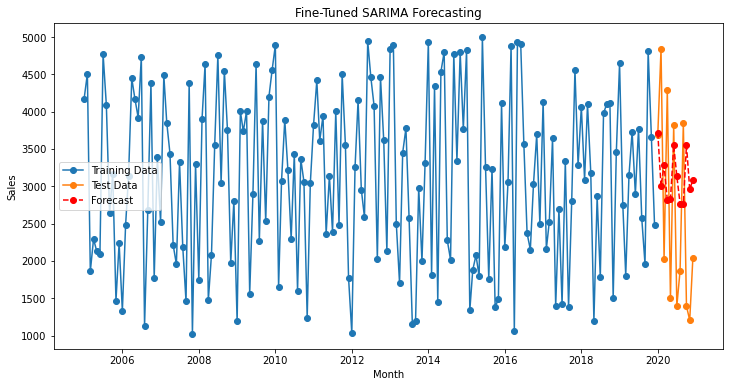

In [181]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import matplotlib.pyplot as plt

# Create a fake time series dataset
np.random.seed(42)
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')
sales_values = np.random.randint(1000, 5000, size=len(date_range))
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)

# Split the dataset into training and testing sets
train_data = df.iloc[:-12]  # Use all but the last 12 months for training
test_data = df.iloc[-12:]   # Use the last 12 months for testing

# Define the parameter space for the grid search
p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(range(0, 2), repeat=3))]

# Perform a grid search to find the best parameters
best_aic = float("inf")
best_order = None
best_seasonal_order = None

for order in product(p, d, q):
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train_data['Sales'], order=order, seasonal_order=seasonal_order)
            fit = model.fit(disp=False)
            current_aic = fit.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

# Fit the SARIMA model with the best parameters
final_model = SARIMAX(train_data['Sales'], order=best_order, seasonal_order=best_seasonal_order)
final_fit = final_model.fit()

# Make predictions for the next 12 months
forecast = final_fit.get_forecast(steps=len(test_data))

# Plot the original time series, test data, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', marker='o')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', marker='o')
plt.plot(test_data.index, forecast.predicted_mean, label='Forecast', linestyle='dashed', marker='o', color='green')
plt.title('Fine-Tuned SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


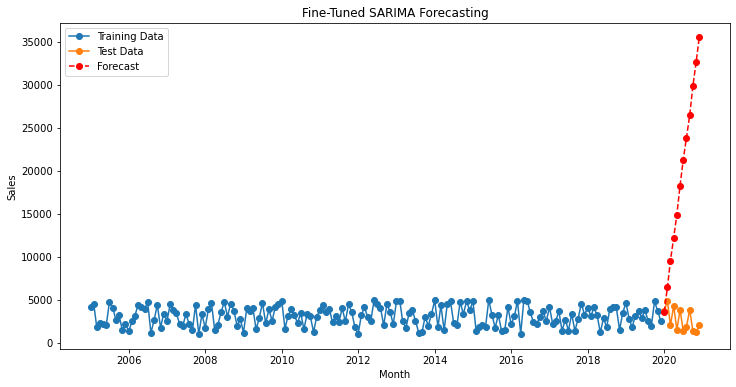

In [182]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import matplotlib.pyplot as plt

# Create a fake time series dataset
np.random.seed(42)
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')
sales_values = np.random.randint(1000, 5000, size=len(date_range))
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)

# Split the dataset into training and testing sets
train_data = df.iloc[:-12]  # Use all but the last 12 months for training
test_data = df.iloc[-12:]   # Use the last 12 months for testing

# Automatic differencing
diff_order = 1  # Adjust if needed
train_diff = train_data['Sales'].diff(diff_order).dropna()

# Define the parameter space for the grid search
p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(range(0, 2), repeat=3))]

best_aic = float("inf")
best_order = None
best_seasonal_order = None
best_diff_order = None

# Perform a grid search to find the best parameters
for order in product(p, d, q):
    for diff_order in range(0, 2):  # Include differencing in the search
        for seasonal_order in seasonal_pdq:
            try:
                model = SARIMAX(train_data['Sales'], order=order, seasonal_order=seasonal_order, trend='c')
                fit = model.fit(disp=False, maxiter=50)
                current_aic = fit.aic
                if current_aic < best_aic:
                    best_aic = current_aic
                    best_order = order
                    best_seasonal_order = seasonal_order
                    best_diff_order = diff_order
            except:
                continue

# Fit the SARIMA model with the best parameters
final_model = SARIMAX(train_data['Sales'], order=best_order, seasonal_order=best_seasonal_order, trend='c')
final_fit = final_model.fit(disp=False, maxiter=50)

# Make predictions for the next 12 months
forecast = final_fit.get_forecast(steps=len(test_data))

# Invert differencing for forecasted values
forecast_values = np.cumsum(forecast.predicted_mean.values)
forecast_series = pd.Series(forecast_values, index=test_data.index)

# Plot the original time series, test data, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', marker='o')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', marker='o')
plt.plot(test_data.index, forecast_series, label='Forecast', linestyle='dashed', marker='o', color='red')
plt.title('Fine-Tuned SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


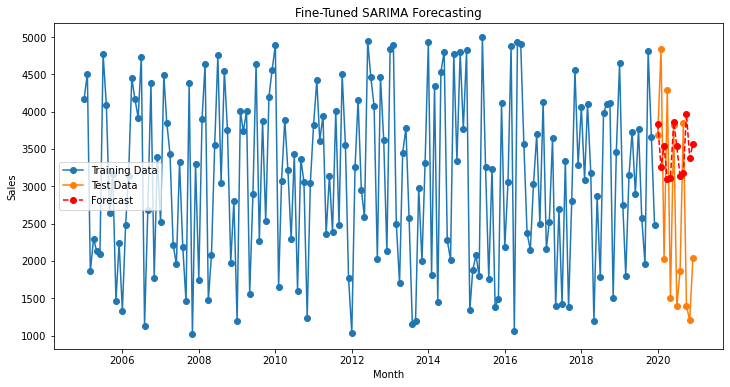

In [183]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
import matplotlib.pyplot as plt

# Create a fake time series dataset
np.random.seed(42)
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')
sales_values = np.random.randint(1000, 5000, size=len(date_range))
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)

# Split the dataset into training and testing sets
train_data = df.iloc[:-12]  # Use all but the last 12 months for training
test_data = df.iloc[-12:]   # Use the last 12 months for testing

# Define the parameter space for the grid search
p = d = q = range(0, 3)  # Increase the range for more exploration
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(range(0, 2), repeat=3))]

best_aic = float("inf")
best_order = None
best_seasonal_order = None

# Perform a grid search to find the best parameters
for order in product(p, d, q):
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(train_data['Sales'], order=order, seasonal_order=seasonal_order, trend='c')
            fit = model.fit(disp=False)
            current_aic = fit.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

# Fit the SARIMA model with the best parameters
final_model = SARIMAX(train_data['Sales'], order=best_order, seasonal_order=best_seasonal_order, trend='c')
final_fit = final_model.fit(disp=False)

# Make predictions for the next 12 months
forecast = final_fit.get_forecast(steps=len(test_data))

# Plot the original time series, test data, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', marker='o')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', marker='o')
plt.plot(test_data.index, forecast.predicted_mean, label='Forecast', linestyle='dashed', marker='o', color='red')
plt.title('Fine-Tuned SARIMA Forecasting')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


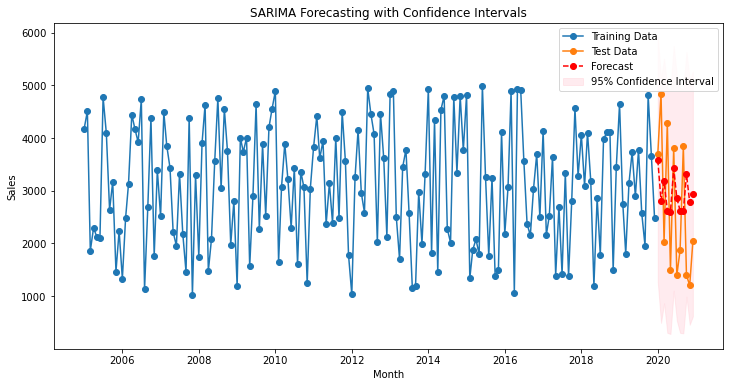

In [184]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Create a fake time series dataset
np.random.seed(42)
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')
sales_values = np.random.randint(1000, 5000, size=len(date_range))
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)

# Split the dataset into training and testing sets
train_data = df.iloc[:-12]  # Use all but the last 12 months for training
test_data = df.iloc[-12:]   # Use the last 12 months for testing

# Fit the SARIMA model
model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c')
fit = model.fit(disp=False)

# Make predictions for the next 12 months with confidence intervals
forecast = fit.get_forecast(steps=len(test_data), alpha=0.05)  # 95% confidence interval

# Plot the original time series, test data, and forecasted values with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', marker='o')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', marker='o')
plt.plot(test_data.index, forecast.predicted_mean, label='Forecast', linestyle='dashed', marker='o', color='red')

# Confidence intervals
plt.fill_between(test_data.index, forecast.conf_int()['lower Sales'], forecast.conf_int()['upper Sales'], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('SARIMA Forecasting with Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


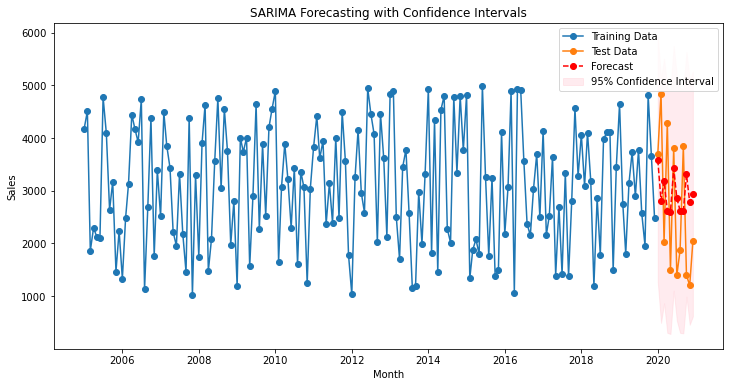

Mean Absolute Error (MAE): 1189.0183226037707
Mean Squared Error (MSE): 1728792.7505334795
Root Mean Squared Error (RMSE): 1314.835636318654
Ljung-Box test p-value: lb_pvalue


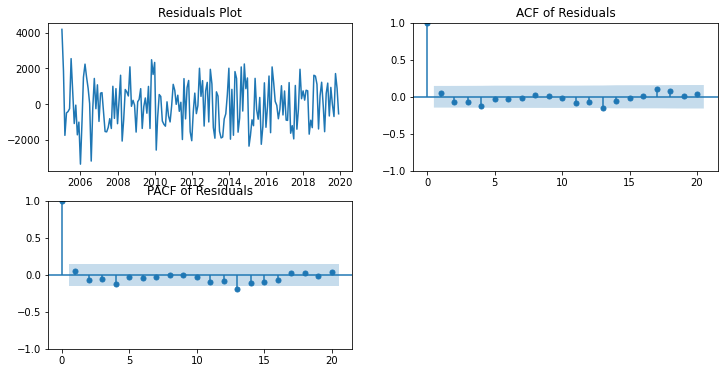

In [185]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

# Create a fake time series dataset
np.random.seed(42)
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')
sales_values = np.random.randint(1000, 5000, size=len(date_range))
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)

# Split the dataset into training and testing sets
train_data = df.iloc[:-12]  # Use all but the last 12 months for training
test_data = df.iloc[-12:]   # Use the last 12 months for testing

# Fit the SARIMA model
model = SARIMAX(train_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c')
fit = model.fit(disp=False)

# Make predictions for the next 12 months with confidence intervals
forecast = fit.get_forecast(steps=len(test_data), alpha=0.05)  # 95% confidence interval

# Plot the original time series, test data, and forecasted values with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Training Data', marker='o')
plt.plot(test_data.index, test_data['Sales'], label='Test Data', marker='o')
plt.plot(test_data.index, forecast.predicted_mean, label='Forecast', linestyle='dashed', marker='o', color='red')

# Confidence intervals
plt.fill_between(test_data.index, forecast.conf_int()['lower Sales'], forecast.conf_int()['upper Sales'], color='pink', alpha=0.3, label='95% Confidence Interval')

plt.title('SARIMA Forecasting with Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Residual Analysis
residuals = fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.title('Residuals Plot')

plt.subplot(2, 2, 2)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')

plt.subplot(2, 2, 3)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('PACF of Residuals')

# Model Evaluation
mae = mean_absolute_error(test_data['Sales'], forecast.predicted_mean)
mse = mean_squared_error(test_data['Sales'], forecast.predicted_mean)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Ljung-Box test for white noise
lb_test, p_value = acorr_ljungbox(residuals, lags=10)
print(f"Ljung-Box test p-value: {p_value}")


# ETS method

- 1st method

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Sales   No. Observations:                   60
Model:             ExponentialSmoothing   SSE                       67345315.559
Optimized:                         True   AIC                            839.860
Trend:                             None   BIC                            844.049
Seasonal:                          None   AICC                           840.587
Seasonal Periods:                  None   Date:                 Tue, 28 Nov 2023
Box-Cox:                          False   Time:                         15:49:10
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1652728                alpha                 True
initial_level              3867.48

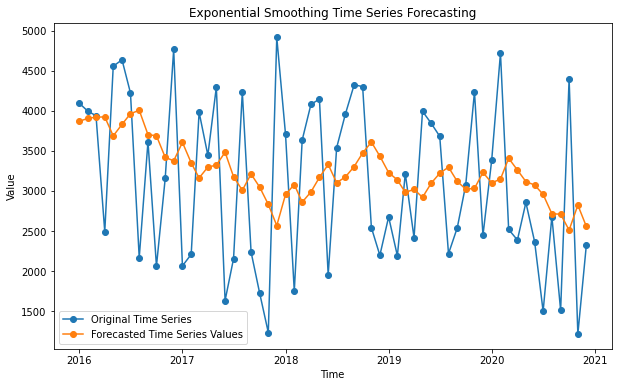

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})

# Fit ETS model
model = ExponentialSmoothing(df['Sales'])
results = model.fit()
df['forecasted'] = results.fittedvalues  # Corrected this line

# Print model summary
print(results.summary())

# Plot original time series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Sales'], label='Original Time Series', marker='o')
plt.plot(df['Month'], df['forecasted'], label='Forecasted Time Series Values', marker='o')
plt.title('Exponential Smoothing Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


- 2nd- Method

c:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:xlabel='Month'>

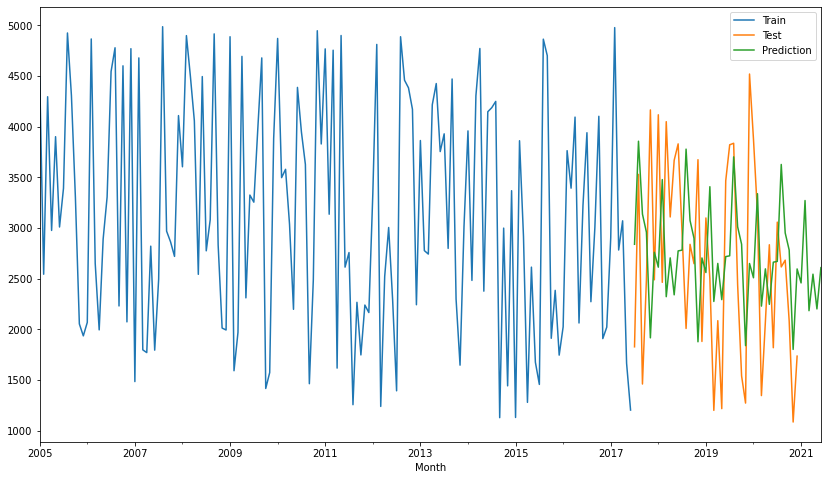

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2005-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))
# Create the initial DataFrame
df = pd.DataFrame({'Month': date_range, 'Sales': sales_values})
df.set_index('Month', inplace=True)
# df['Month'] = pd.to_datetime(df['Month'])
# df
# ## Splitting the train and test dataset
train_data= df.iloc[:150]
test_data= df.iloc[150:]

## Fitting Exponential smoothing model

fitted_model= ExponentialSmoothing(train_data['Sales'],
                                trend='mul',
                                seasonal='mul', 
                                seasonal_periods=12).fit()

## Forecasting next 4 years
test_prediction= fitted_model.forecast(48)

## Plotting 

train_data['Sales'].plot(legend=True, label='Train',figsize=(14,8))
test_data['Sales'].plot(legend=True, label='Test',figsize=(14,8))
test_prediction.plot(legend=True, label='Prediction',figsize=(14,8))

# Prophet

15:53:34 - cmdstanpy - INFO - Chain [1] start processing
15:53:34 - cmdstanpy - INFO - Chain [1] done processing


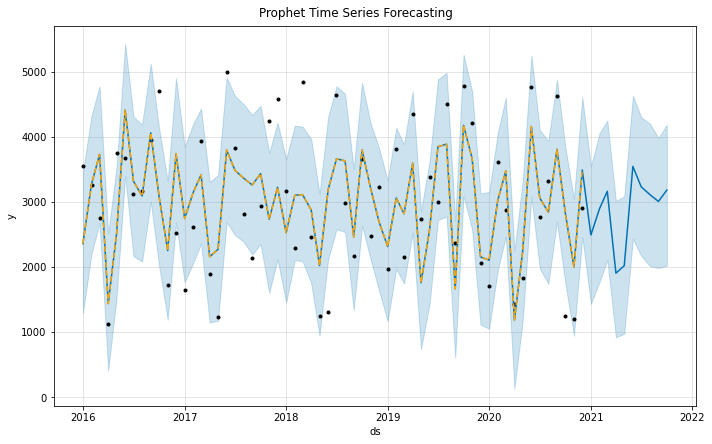

In [25]:
from prophet import Prophet

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Fit Prophet model
model = Prophet()
model.fit(df)

# Create future dataframe for forecasting
future = model.make_future_dataframe(periods=10, freq='MS')  # Specify the frequency as 'MS' for monthly data

# Forecast
forecast = model.predict(future)

# Plot original time series and forecasted values
fig = model.plot(forecast)

# Customize the color of the forecasted trend (yhat)
plt.plot(df['ds'], forecast['yhat'][:len(df)], color='orange', label='Forecasted Trend', linestyle='--')

fig.suptitle('Prophet Time Series Forecasting', y=1.02)
plt.show()


15:01:10 - cmdstanpy - INFO - Chain [1] start processing
15:01:10 - cmdstanpy - INFO - Chain [1] done processing


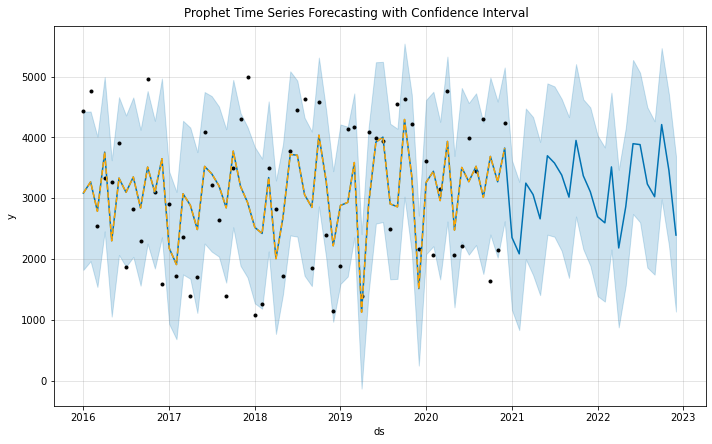

In [189]:
from prophet import Prophet

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Fit Prophet model
model = Prophet()
model.fit(df)

# Create future dataframe for forecasting
future = model.make_future_dataframe(periods=24, freq='MS')  # Forecasting for an additional 24 months

# Forecast with uncertainty intervals
forecast = model.predict(future)

# Plot original time series and forecasted values with uncertainty
fig = model.plot(forecast, uncertainty=True)

# Customize the color of the forecasted trend (yhat)
plt.plot(df['ds'], forecast['yhat'][:len(df)], color='orange', label='Forecasted Trend', linestyle='--')

fig.suptitle('Prophet Time Series Forecasting with Confidence Interval', y=1.02)
plt.show()


15:04:21 - cmdstanpy - INFO - Chain [1] start processing
15:04:22 - cmdstanpy - INFO - Chain [1] done processing


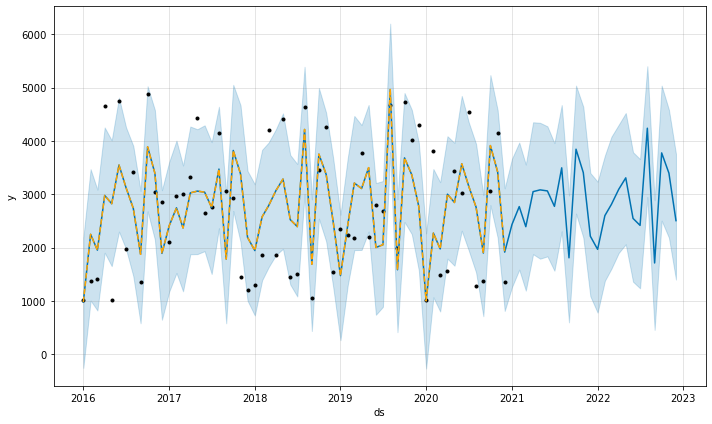

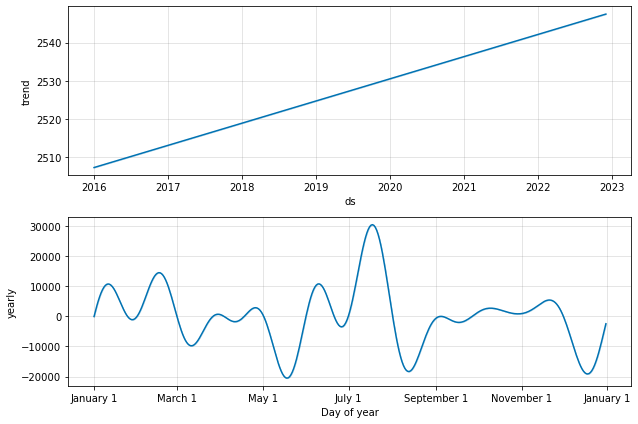

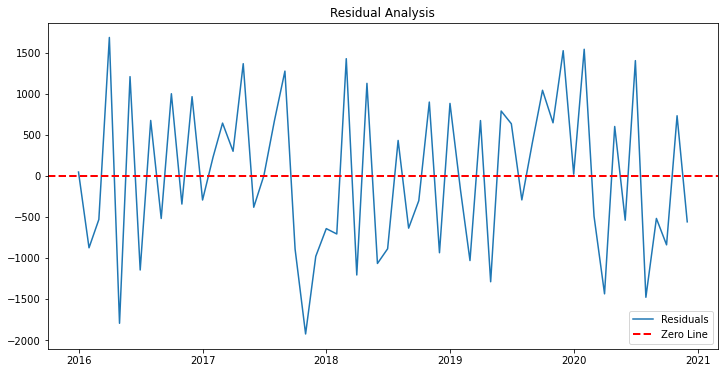

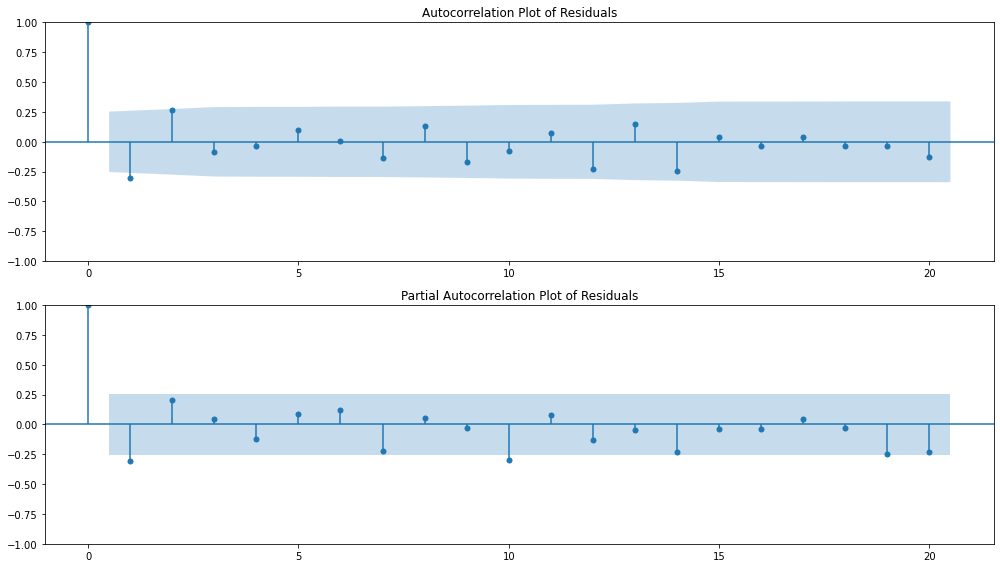

Mean Absolute Error (MAE): 826.1599323167043
Mean Squared Error (MSE): 887264.9391112869
Root Mean Squared Error (RMSE): 941.9474184429229


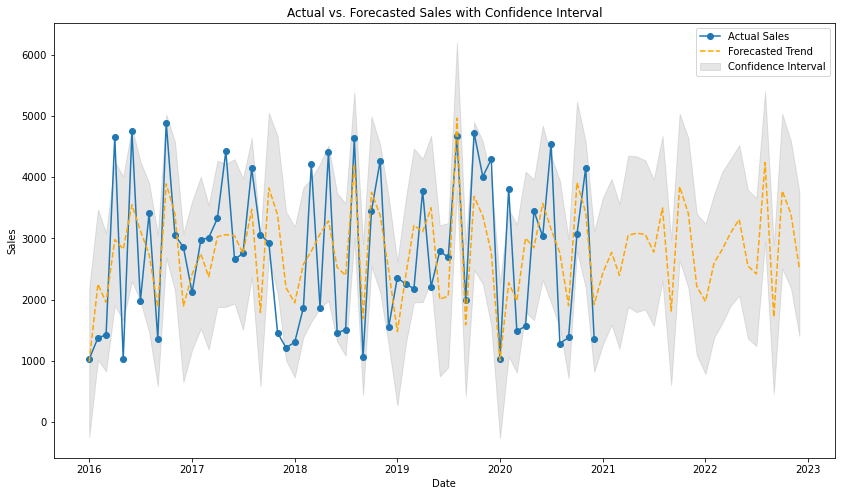

In [191]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Fit Prophet model
model = Prophet()
model.fit(df)

# Create future dataframe for forecasting
future = model.make_future_dataframe(periods=24, freq='MS')  # Forecasting for an additional 24 months

# Forecast with uncertainty intervals
forecast = model.predict(future)

# Plot original time series and forecasted values with uncertainty
fig = model.plot(forecast, uncertainty=True)

# Customize the color of the forecasted trend (yhat)
plt.plot(df['ds'], forecast['yhat'][:len(df)], color='orange', label='Forecasted Trend', linestyle='--')

# Plot seasonality components
fig_seasonality = model.plot_components(forecast)

# Residual Analysis
residuals = df['y'] - forecast['yhat'][:len(df)]
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Line')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plot_acf(residuals, lags=20, ax=plt.gca(), title='Autocorrelation Plot of Residuals')
plt.subplot(2, 1, 2)
plot_pacf(residuals, lags=20, ax=plt.gca(), title='Partial Autocorrelation Plot of Residuals')
plt.tight_layout()
plt.show()

# Model Evaluation
mae = mean_absolute_error(df['y'], forecast['yhat'][:len(df)])
mse = mean_squared_error(df['y'], forecast['yhat'][:len(df)])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate and plot confidence intervals
plt.figure(figsize=(14, 8))
plt.plot(df['ds'], df['y'], label='Actual Sales', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Trend', linestyle='--', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title('Actual vs. Forecasted Sales with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Neural Prophet Model

In [196]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Instantiate NeuralProphet model
model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Fit the model
model.fit(df, freq='MS')

# Create future dataframe for forecasting
future = model.make_future_dataframe(df, periods=10, n_historic_predictions=len(df))

# Forecast
forecast = model.predict(future)

# Plot original time series and forecasted values
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, xlabel='Time', ylabel='Sales', ax=ax)
ax.legend(['Original Time Series', 'Forecast'])
plt.title('NeuralProphet Time Series Forecasting')
plt.show()


ModuleNotFoundError: No module named 'neuralprophet'

# LSTM

1/1 [==============================] - 0s 75ms/step


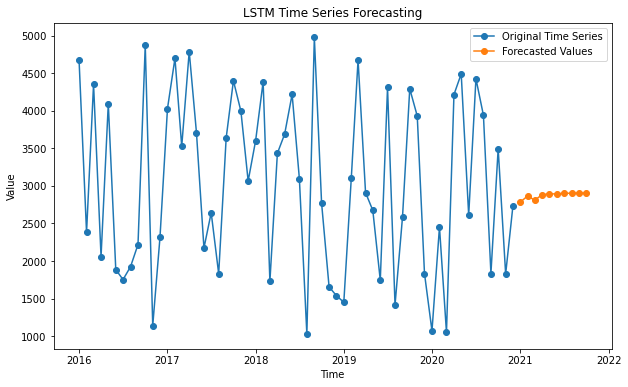

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Normalize the time series
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_normalized = scaler.fit_transform(df['y'].values.reshape(-1, 1)).flatten()

# Prepare data for LSTM
def create_dataset(time_series, n_steps):
    X, y = [], []
    for i in range(len(time_series) - n_steps):
        X.append(time_series[i:(i + n_steps)])
        y.append(time_series[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_dataset(time_series_normalized, n_steps)

# Reshape input data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=100, verbose=0)

# Forecast future values
future_values = []
current_batch = X[-1].reshape((1, n_steps, 1))
for i in range(10):
    future_value = model.predict(current_batch)[0, 0]
    future_values.append(future_value)
    current_batch = np.append(current_batch[:, 1:, :], [[[future_value]]], axis=1)

# Denormalize forecasted values
forecast = scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()

# Plot original time series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Time Series', marker='o')
plt.plot(pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=10, freq='MS'), forecast, label='Forecasted Values', marker='o')
plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 19ms/step


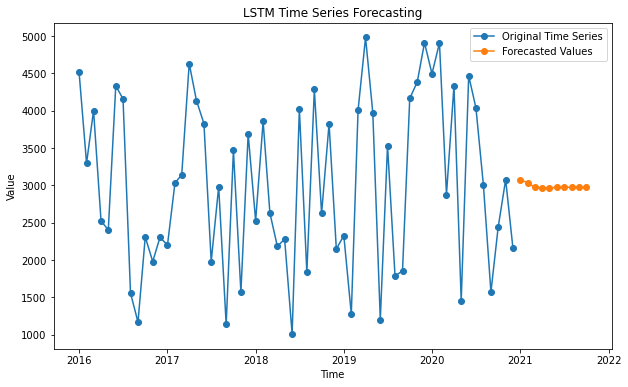

Mean Squared Error (MSE): 1035245.3236116112
R-squared (R2): 0.008081184376238615


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})

# Normalize the time series
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_normalized = scaler.fit_transform(df['y'].values.reshape(-1, 1)).flatten()

# Prepare data for LSTM
def create_dataset(time_series, n_steps):
    X, y = [], []
    for i in range(len(time_series) - n_steps):
        X.append(time_series[i:(i + n_steps)])
        y.append(time_series[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_dataset(time_series_normalized, n_steps)

# Reshape input data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=200, verbose=0)

# Forecast future values
future_values = []
current_batch = X[-1].reshape((1, n_steps, 1))
for i in range(10):
    future_value = model.predict(current_batch)[0, 0]
    future_values.append(future_value)
    current_batch = np.append(current_batch[:, 1:, :], [[[future_value]]], axis=1)

# Denormalize forecasted values
forecast = scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()

# Calculate accuracy metrics
mse = mean_squared_error(df['y'].iloc[-10:], forecast)
r2 = r2_score(df['y'].iloc[-10:], forecast)

# Plot original time series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Time Series', marker='o')
plt.plot(pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=10, freq='MS'), forecast, label='Forecasted Values', marker='o')
plt.title('LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Print accuracy metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


1/1 [==============================] - 0s 28ms/step


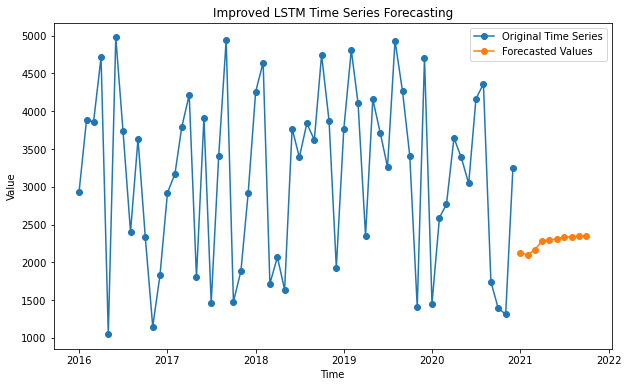

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Normalize the time series
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_normalized = scaler.fit_transform(df['y'].values.reshape(-1, 1)).flatten()

# Prepare data for LSTM
def create_dataset(time_series, n_steps):
    X, y = [], []
    for i in range(len(time_series) - n_steps):
        X.append(time_series[i:(i + n_steps)])
        y.append(time_series[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_dataset(time_series_normalized, n_steps)

# Reshape input data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X, y, epochs=100, validation_split=0.1, callbacks=[early_stopping], verbose=0)

# Forecast future values
future_values = []
current_batch = X[-1].reshape((1, n_steps, 1))
for i in range(10):
    future_value = model.predict(current_batch)[0, 0]
    future_values.append(future_value)
    current_batch = np.append(current_batch[:, 1:, :], [[[future_value]]], axis=1)

# Denormalize forecasted values
forecast = scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()

# Plot original time series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Time Series', marker='o')
forecast_dates = pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=10, freq='MS')
plt.plot(forecast_dates, forecast, label='Forecasted Values', marker='o')
plt.title('Improved LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


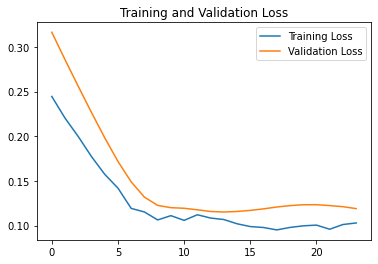

1/1 [==============================] - 0s 31ms/step


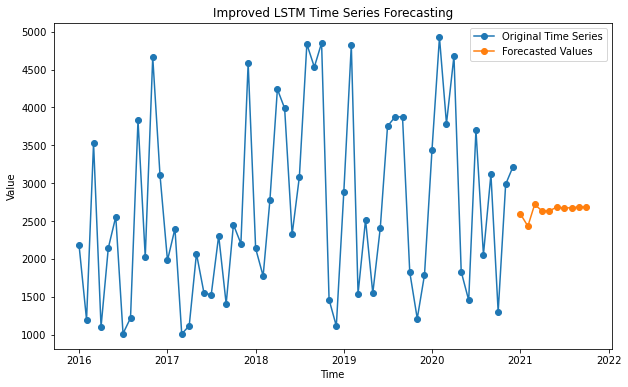

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Normalize the time series
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_normalized = scaler.fit_transform(df['y'].values.reshape(-1, 1)).flatten()

# Prepare data for LSTM
def create_dataset(time_series, n_steps):
    X, y = [], []
    for i in range(len(time_series) - n_steps):
        X.append(time_series[i:(i + n_steps)])
        y.append(time_series[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_dataset(time_series_normalized, n_steps)

# Reshape input data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X, y, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Forecast future values
future_values = []
current_batch = X[-1].reshape((1, n_steps, 1))
for i in range(10):
    future_value = model.predict(current_batch)[0, 0]
    future_values.append(future_value)
    current_batch = np.append(current_batch[:, 1:, :], [[[future_value]]], axis=1)

# Denormalize forecasted values
forecast = scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()

# Plot original time series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Time Series', marker='o')
forecast_dates = pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=10, freq='MS')
plt.plot(forecast_dates, forecast, label='Forecasted Values', marker='o')
plt.title('Improved LSTM Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


## Gated recurrent nwural network (GRU)

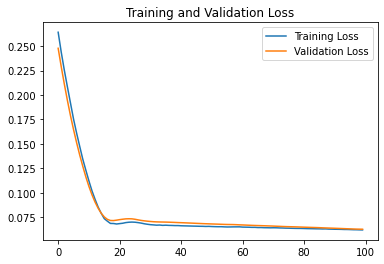

1/1 [==============================] - 0s 50ms/step


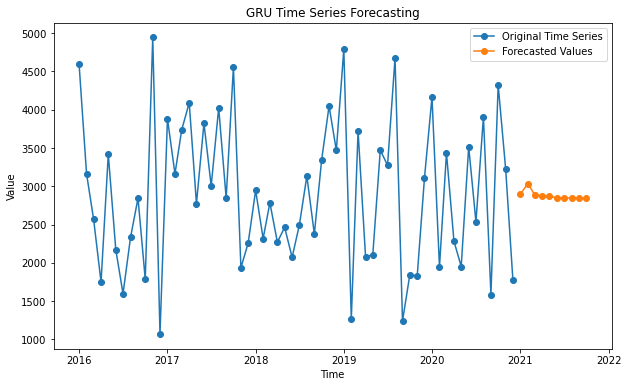

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Normalize the time series
scaler = MinMaxScaler(feature_range=(0, 1))
time_series_normalized = scaler.fit_transform(df['y'].values.reshape(-1, 1)).flatten()

# Prepare data for GRU
def create_dataset(time_series, n_steps):
    X, y = [], []
    for i in range(len(time_series) - n_steps):
        X.append(time_series[i:(i + n_steps)])
        y.append(time_series[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_dataset(time_series_normalized, n_steps)

# Reshape input data for GRU
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X, y, epochs=100, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Forecast future values
future_values = []
current_batch = X[-1].reshape((1, n_steps, 1))
for i in range(10):
    future_value = model.predict(current_batch)[0, 0]
    future_values.append(future_value)
    current_batch = np.append(current_batch[:, 1:, :], [[[future_value]]], axis=1)

# Denormalize forecasted values
forecast = scaler.inverse_transform(np.array(future_values).reshape(-1, 1)).flatten()

# Plot original time series and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Time Series', marker='o')
forecast_dates = pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=10, freq='MS')
plt.plot(forecast_dates, forecast, label='Forecasted Values', marker='o')
plt.title('GRU Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Gausssian Process

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import GPy

ImportError: cannot import name 'Tester' from 'numpy.testing' (c:\Users\zeesh\anaconda3\lib\site-packages\numpy\testing\__init__.py)

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import GPy

# Generate a date range from January 2016 to December 2020
date_range = pd.date_range(start='2016-01-01', end='2020-12-31', freq='MS')

# Generate random sales values
sales_values = np.random.randint(1000, 5000, size=len(date_range))

# Create the initial DataFrame
df = pd.DataFrame({'ds': date_range, 'y': sales_values})  # Use 'ds' for the date column and 'y' for the target column

# Normalize the time series
y_mean, y_std = np.mean(df['y']), np.std(df['y'])
df['y_normalized'] = (df['y'] - y_mean) / y_std

# Define the Gaussian Process model
kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(df.index.values.reshape(-1, 1), df['y_normalized'].values.reshape(-1, 1), kernel)

# Optimize the model
model.optimize()

# Create future points for prediction
future_points = np.arange(len(df), len(df) + 10).reshape(-1, 1)

# Make predictions with uncertainty
mean, var = model.predict(future_points)

# Denormalize the predictions
forecast = (mean * y_std) + y_mean
uncertainty = np.sqrt(var) * y_std

# Plot original time series, forecasted values, and uncertainty
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Time Series', marker='o')
plt.plot(pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=10, freq='MS'), forecast, label='Forecasted Values', marker='o')
plt.fill_between(pd.date_range(start=df['ds'].iloc[-1] + pd.DateOffset(months=1), periods=10, freq='MS'), forecast - uncertainty, forecast + uncertainty, color='gray', alpha=0.2, label='Uncertainty')
plt.title('Gaussian Processes Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


ImportError: cannot import name 'Tester' from 'numpy.testing' (c:\Users\zeesh\anaconda3\lib\site-packages\numpy\testing\__init__.py)